# Part I (a) MNIST Model Visualization 

The MNIST model is constructed using keras. 
The model is composed of 2 convolutional layers, and the test accuracy achieves ~99%.  
This model refenreced Raghavendra Kotikalapudi's [official example for keras-vis package](https://github.com/raghakot/keras-vis/blob/master/examples/mnist/activation_maximization.ipynb)[3].

In [1]:
from __future__ import print_function

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


/Users/MichelleZhu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


***To save time and capacity You can skip the next two blocks and draw the trained model from our git repo.***

In [2]:
batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2346 - acc: 0.9276 - val_loss: 0.0531 - val_acc: 0.9826
Epoch 2/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0840 - acc: 0.9743 - val_loss: 0.0471 - val_acc: 0.9844
Epoch 3/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0614 - acc: 0.9816 - val_loss: 0.0296 - val_acc: 0.9902
Epoch 4/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0505 - acc: 0.9844 - val_loss: 0.0330 - val_acc: 0.9892
Epoch 5/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0430 - acc: 0.9862 - val_loss: 0.0282 - val_acc: 0.9908
Test loss: 0.02823972630938515
Test accuracy: 0.9908


In [4]:
model.save('mnist_train_model.h5')

In [2]:
from keras.models import load_model

model = load_model('/Users/MichelleZhu/Documents/GitHub/CNN-Feature-Visualization/doc/mnist_train_model.h5')

## Summary of the MNIST model

The MNIST model with 2 convolutional layer predicts the hand-written digit input picture to a most likely digit from 0 to 9. Besides of that, a max-pooling layer and two dropout layer are added after the first two convolutional layer. It was Trained on 60000 samples, validated on 10000 samples. Finally 5 epoch got 0.9908 test accuracy.

The last dense layer named "Preds" is constructed using softmax with 10 outputs, each reperents the possibility of a digit from 0 to 9. 


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Dense Layer Visualization
The MNIST data set is in grey scale, which does not concern classifications of colors and shapes, so we only perform feature visualize by optimization on the last dense layer.

**Command line to install the keras-vis package: ** pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

As suggested by the [official document](https://github.com/raghakot/keras-vis/blob/master/examples/mnist/activation_maximization.ipynb) the 'softmax' need to be converted to 'linear' at the last layer. Otherwise, there will be problem of suboptimal.

## Step 1: Visualizing input that maximizes the output of node 0


In [13]:
from vis.visualization import visualize_activation
from vis.visualization import get_num_filters
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline


In [27]:
#In Last Dense layer, get the total number of output
get_num_filters(model.layers[7])

10

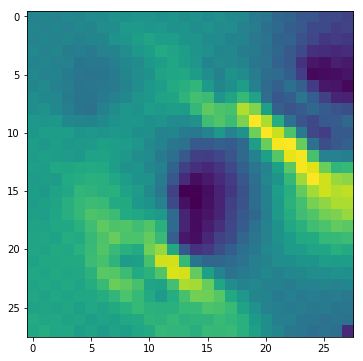

In [8]:
plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])

In [9]:
print(layer_idx)

7


### Insights on the first try of node 0 feature visualization: 
By seting **filter_indices = 0**, the visualization of node 0 maximized the input so that final output. However it does not look like a zero. So we need to do the following two steps to optimize the input:
* **Input range :** the preprocess range by defualt is (0,1), we should change the input range and specify between **(0.,1.)** (float type)
* **Regularization Parameter :** The Regularization Parameter default weights might be dominating activation maximization loss weight. One way to debug this is to use **verbose=True** and examine individual loss values.

## Step 2: Specifying the Input Range

Set the input_range = (0.,1.), and then visualize the node 0 input image again.

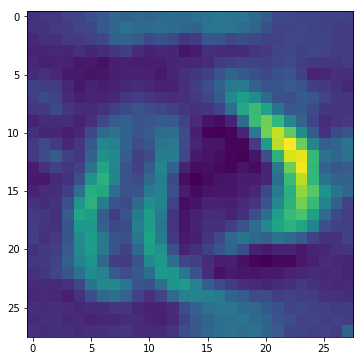

In [10]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

Here we can see that the input image has much less noise than the one without specifying the input range 

## Step 3: Tuning regularization weights

The activation maximization function has a issue that the optimized input can go out of the traning distribution space. Total variation in the function ensures that the input images are blobber and not scattered, so that the pattern in the image can be recognized. The problem is sometimes the total variation and L-p norm can dominante the main Activation Maximization loss. 

Lets see what individual losses are, with verbose=True

Iteration: 1, named_losses: [('ActivationMax Loss', -0.16939992),
 ('L-6.0 Norm Loss', 0.019829458),
 ('TV(2.0) Loss', 0.095013484)], overall loss: -0.05455698072910309
Iteration: 2, named_losses: [('ActivationMax Loss', -78.88112),
 ('L-6.0 Norm Loss', 0.17227083),
 ('TV(2.0) Loss', 490.14194)], overall loss: 411.43310546875
Iteration: 3, named_losses: [('ActivationMax Loss', -215.9466),
 ('L-6.0 Norm Loss', 0.20538463),
 ('TV(2.0) Loss', 194.44786)], overall loss: -21.293350219726562
Iteration: 4, named_losses: [('ActivationMax Loss', -320.78104),
 ('L-6.0 Norm Loss', 0.21546638),
 ('TV(2.0) Loss', 179.79845)], overall loss: -140.7671356201172
Iteration: 5, named_losses: [('ActivationMax Loss', -424.22668),
 ('L-6.0 Norm Loss', 0.23633803),
 ('TV(2.0) Loss', 198.54694)], overall loss: -225.44342041015625
Iteration: 6, named_losses: [('ActivationMax Loss', -509.18906),
 ('L-6.0 Norm Loss', 0.25792384),
 ('TV(2.0) Loss', 217.37494)], overall loss: -291.5561828613281
Iteration: 7, named

Iteration: 82, named_losses: [('ActivationMax Loss', -1596.7812),
 ('L-6.0 Norm Loss', 1.0481691),
 ('TV(2.0) Loss', 793.7842)], overall loss: -801.9488525390625
Iteration: 83, named_losses: [('ActivationMax Loss', -1602.5057),
 ('L-6.0 Norm Loss', 1.0500907),
 ('TV(2.0) Loss', 800.6406)], overall loss: -800.8150634765625
Iteration: 84, named_losses: [('ActivationMax Loss', -1602.982),
 ('L-6.0 Norm Loss', 1.0559827),
 ('TV(2.0) Loss', 798.5863)], overall loss: -803.3397216796875
Iteration: 85, named_losses: [('ActivationMax Loss', -1604.8064),
 ('L-6.0 Norm Loss', 1.0579965),
 ('TV(2.0) Loss', 802.51514)], overall loss: -801.2332763671875
Iteration: 86, named_losses: [('ActivationMax Loss', -1609.566),
 ('L-6.0 Norm Loss', 1.064042),
 ('TV(2.0) Loss', 804.463)], overall loss: -804.0389404296875
Iteration: 87, named_losses: [('ActivationMax Loss', -1607.3531),
 ('L-6.0 Norm Loss', 1.0680044),
 ('TV(2.0) Loss', 804.29755)], overall loss: -801.9876098632812
Iteration: 88, named_losses: [

Iteration: 146, named_losses: [('ActivationMax Loss', -1648.0942),
 ('L-6.0 Norm Loss', 1.2292676),
 ('TV(2.0) Loss', 837.5692)], overall loss: -809.2957763671875
Iteration: 147, named_losses: [('ActivationMax Loss', -1645.5366),
 ('L-6.0 Norm Loss', 1.2350146),
 ('TV(2.0) Loss', 835.67676)], overall loss: -808.6248779296875
Iteration: 148, named_losses: [('ActivationMax Loss', -1647.0359),
 ('L-6.0 Norm Loss', 1.231557),
 ('TV(2.0) Loss', 836.4132)], overall loss: -809.39111328125
Iteration: 149, named_losses: [('ActivationMax Loss', -1646.7808),
 ('L-6.0 Norm Loss', 1.2385288),
 ('TV(2.0) Loss', 835.93787)], overall loss: -809.6043701171875
Iteration: 150, named_losses: [('ActivationMax Loss', -1648.9),
 ('L-6.0 Norm Loss', 1.2341131),
 ('TV(2.0) Loss', 838.8411)], overall loss: -808.8247680664062
Iteration: 151, named_losses: [('ActivationMax Loss', -1649.9885),
 ('L-6.0 Norm Loss', 1.232891),
 ('TV(2.0) Loss', 839.9134)], overall loss: -808.8422241210938
Iteration: 152, named_losse

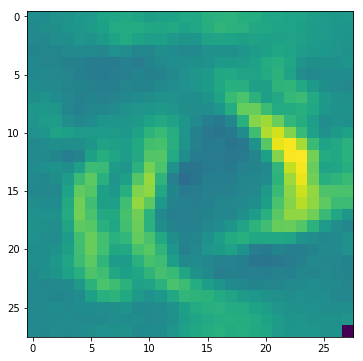

In [11]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), verbose=True)
plt.imshow(img[..., 0])

The Overall Loss was affected by TV loss and the ActivationMax Loss is not converging. 
So We would like to set the total variation loss and L-p norm weight to 0. So wee can see how is the ActivationMax Loss performing in each iteration.

Iteration: 1, named_losses: [('ActivationMax Loss', -0.05816499)], overall loss: -0.058164991438388824
Iteration: 2, named_losses: [('ActivationMax Loss', 0.7910058)], overall loss: 0.7910057902336121
Iteration: 3, named_losses: [('ActivationMax Loss', -195.92493)], overall loss: -195.9249267578125
Iteration: 4, named_losses: [('ActivationMax Loss', -427.51993)], overall loss: -427.5199279785156
Iteration: 5, named_losses: [('ActivationMax Loss', -645.6162)], overall loss: -645.6162109375
Iteration: 6, named_losses: [('ActivationMax Loss', -835.34766)], overall loss: -835.34765625
Iteration: 7, named_losses: [('ActivationMax Loss', -1010.95026)], overall loss: -1010.9502563476562
Iteration: 8, named_losses: [('ActivationMax Loss', -1176.8204)], overall loss: -1176.8204345703125
Iteration: 9, named_losses: [('ActivationMax Loss', -1330.1636)], overall loss: -1330.16357421875
Iteration: 10, named_losses: [('ActivationMax Loss', -1473.8228)], overall loss: -1473.82275390625
Iteration: 11,

Iteration: 150, named_losses: [('ActivationMax Loss', -15206.598)], overall loss: -15206.59765625
Iteration: 151, named_losses: [('ActivationMax Loss', -15301.923)], overall loss: -15301.9228515625
Iteration: 152, named_losses: [('ActivationMax Loss', -15392.654)], overall loss: -15392.654296875
Iteration: 153, named_losses: [('ActivationMax Loss', -15488.498)], overall loss: -15488.498046875
Iteration: 154, named_losses: [('ActivationMax Loss', -15580.361)], overall loss: -15580.361328125
Iteration: 155, named_losses: [('ActivationMax Loss', -15674.783)], overall loss: -15674.783203125
Iteration: 156, named_losses: [('ActivationMax Loss', -15768.723)], overall loss: -15768.72265625
Iteration: 157, named_losses: [('ActivationMax Loss', -15861.549)], overall loss: -15861.548828125
Iteration: 158, named_losses: [('ActivationMax Loss', -15955.45)], overall loss: -15955.4501953125
Iteration: 159, named_losses: [('ActivationMax Loss', -16049.098)], overall loss: -16049.09765625
Iteration: 1

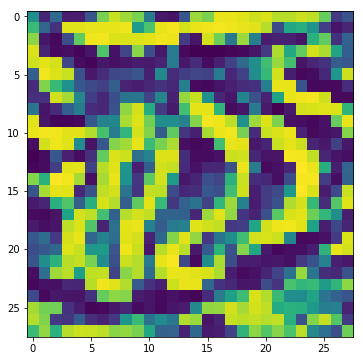

In [12]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                           tv_weight=0., lp_norm_weight=0., verbose=True)
plt.imshow(img[..., 0])

The ActivationMax Loss is converging after setting the other two loss weights to zero. However, the input picture also looks very unnatural. So we would like to set several different level of total variation weights and see which level can generate a more natural-look input.

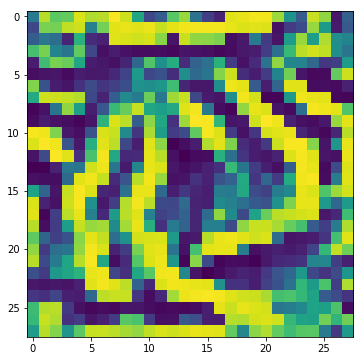

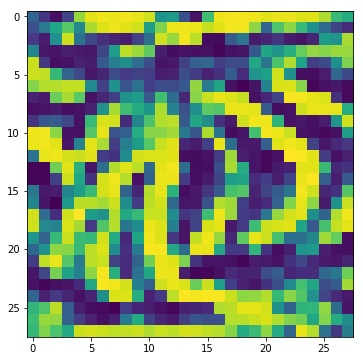

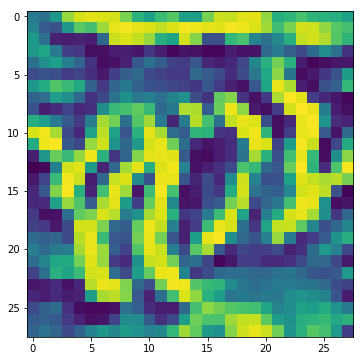

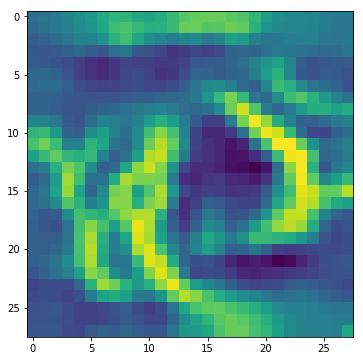

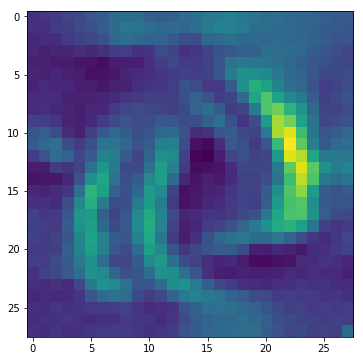

In [13]:
for tv_weight in [1e-3, 1e-2, 1e-1, 1, 10]:
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                               tv_weight=tv_weight, lp_norm_weight=0.)
    plt.figure()
    plt.imshow(img[..., 0])

Here we can see that the default weight for Total Variation = 10 is the optimal choice. So we keep it for the rest of the 9 nodes input.

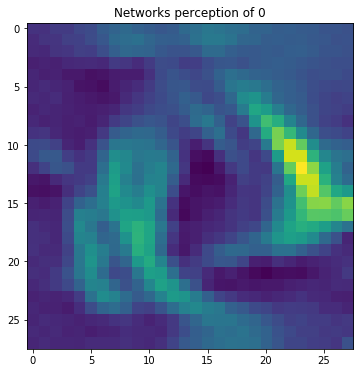

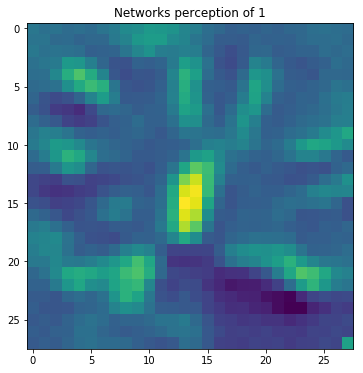

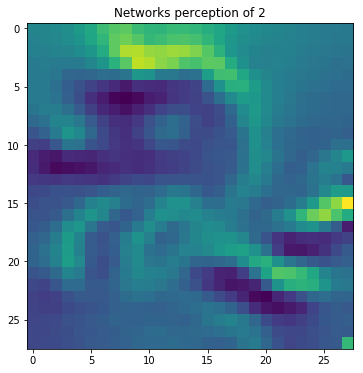

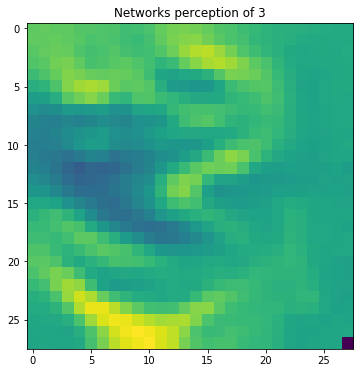

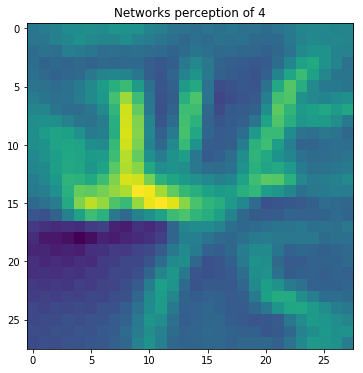

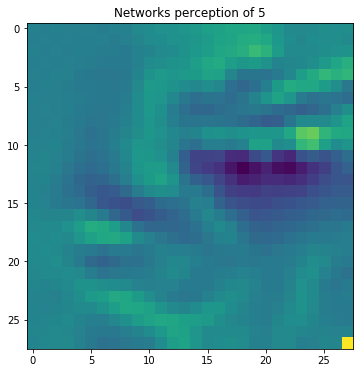

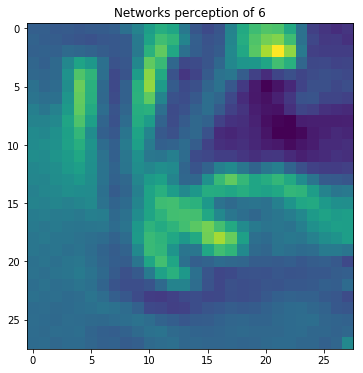

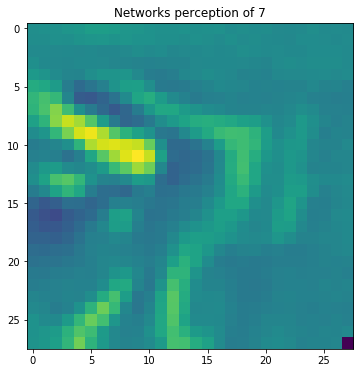

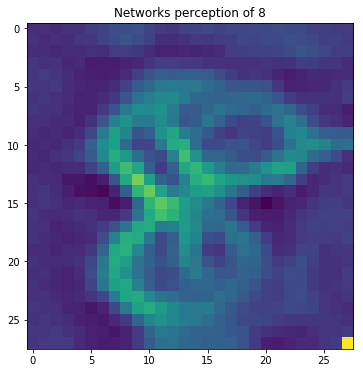

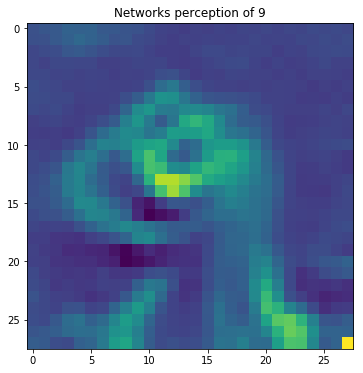

In [14]:
for output_idx in np.arange(10):
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])

Here we can see that activation maximized input images can still be recognized to what it originally looks like. 